## PyTorch computer vision

In [4]:
# Import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)
      

1.12.1+cu113
0.13.1+cu113


## 1. Getting a dataset

In [5]:
# setup trainng data
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None

)

In [6]:
len(train_data),len(test_data)

(60000, 10000)

In [7]:
## see the first training example
images,labels=train_data[0]

In [8]:
images,labels

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [9]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
class_to_idx= train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [11]:
images.shape #-- >[c,h,w]>

torch.Size([1, 28, 28])

## visualizing our data

image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

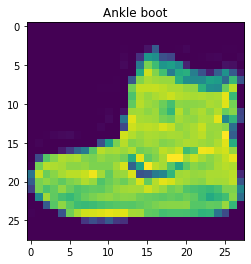

In [12]:
import matplotlib.pyplot as plt
print("image shape :",images.shape)

plt.imshow(images.squeeze())
plt.title(class_names[labels])

image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

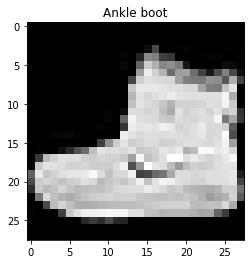

In [13]:
import matplotlib.pyplot as plt
print("image shape :",images.shape)

plt.imshow(images.squeeze(),cmap="gray")
plt.title(class_names[labels])

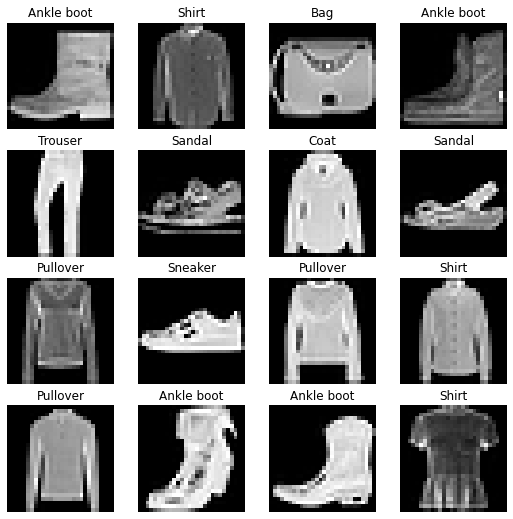

In [14]:
## plt more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1, rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


## Prepare DataLoader

In [15]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [16]:
from torch.utils.data import DataLoader

#SET THE BATCH SIZE
BATCH_SIZE=32
train_dataloader= DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

test_dataloader= DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

train_dataloader,test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7f6fbc9a16d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6fbc9a1590>)

In [17]:
print("Total Batches :",len(train_dataloader))

Total Batches : 1875


In [18]:
# Let's check out what what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f6fbc9a16d0>, <torch.utils.data.dataloader.DataLoader object at 0x7f6fbc9a1590>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [19]:
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [20]:
len(train_features_batch)

32

Image size: torch.Size([1, 28, 28])
Label: 6,label size: torch.Size([])


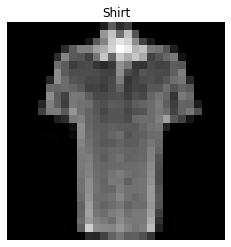

In [21]:
#show a sample
torch.manual_seed(42)
random_idx= torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label},label size: {label.shape}")

## Model 0: Build a basline model

In [22]:
from torch import nn
flatten_model=nn.Flatten()

x= train_features_batch[0]

output=flatten_model(x) # perform forward pass

#print out what happend

print(f"shape before flatting :",x.shape) #-> [color_channel,height,width]
print(f"shape after flattening :",output.shape) #-> [color_channels,height*width]

shape before flatting : torch.Size([1, 28, 28])
shape after flattening : torch.Size([1, 784])


In [23]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,**kwargs):
    self.input_shape=kwargs["input_shape"]
    self.hidden_units=kwargs["hidden_units"]
    self.output_shape=kwargs["output_shape"]
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=self.input_shape,out_features=self.hidden_units),
        nn.Linear(in_features=self.hidden_units,out_features=self.output_shape)

    )


  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.layer_stack(x)

  


In [24]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [25]:
torch.manual_seed(42)
model_0= FashionMNISTModelV0(input_shape=28*28,hidden_units=10,output_shape=len(class_names)).to(device)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [26]:
pred=model_0(train_features_batch)
pred.shape

torch.Size([32, 10])

In [27]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## setup loss, optimizer and evaluation metrics

In [28]:
def accuracy_fn(y_true,y_pred):
  '''
  accuracy function to calculate the accuracy
  '''
  score=torch.eq(y_true,y_pred).sum().item()
  final_score=(score/len(y_true)) * 100
  return final_score

In [29]:
##setup loss function and optimizer
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [30]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'params': [0, 1, 2, 3]}]}

## Training Loop 

In [31]:
from tqdm.auto import tqdm
import time
torch.manual_seed(42)

start_time=time.time()

## set epoch
epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n-----")
  train_loss=0
  train_acc=0
  for batch, (x,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred=model_0(x)
    loss=loss_fn(y_pred,y)
    acc=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    train_acc += acc
    train_loss +=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch %400==0:
      print(f"Looked at {batch*len(x)}/{len(train_dataloader.dataset)}")
  train_acc=train_acc/len(train_dataloader)
  train_loss /= len(train_dataloader)

##testing loop

  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for x,y in test_dataloader:
      test_pred=model_0(x)
      test_loss +=loss_fn(test_pred,y)
      test_acc +=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"\nTrain loss: {train_loss:.5f} | Train accuracy: {train_acc:.5f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc: .5f}%")
end= time.time()

print("\n\n")
print("Total time taken :", end-start_time)

  ## Add a loop through the training batches


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.59039 | Train accuracy: 79.17167% | Test loss: 0.50954 | Test acc:  82.03874%
Epoch: 1 
-----
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.47633 | Train accuracy: 83.32000% | Test loss: 0.47989 | Test acc:  83.19688%
Epoch: 2 
-----
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.45503 | Train accuracy: 84.05167% | Test loss: 0.47664 | Test acc:  83.42652%



Total time taken : 23.643007516860962


## Creating prediction functions

In [32]:
device="cpu"

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
def eval_fn(model: torch.nn.Module,
            data_loader: torch.utils.data.DataLoader,
            loss_fn : torch.nn.Module,
            accuracy_fn,
            device:torch.device=device):
  """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
  """
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      x,y=x.to(device),y.to(device)
      y_pred=model(x)
      loss +=loss_fn(y_pred,y)
      acc +=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    loss /=len(data_loader)
    acc /=len(data_loader)
  
  return {"model_name" : model.__class__.__name__,
         "model_loss" : loss.item(),
         "model_acc" : acc}

##testing
model_0_results= eval_fn(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,
                         accuracy_fn=accuracy_fn)

model_0_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## setting up device agnostic-code

In [34]:
import torch
device= "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [35]:
next(model_0.parameters()).device

device(type='cpu')

### Introducing non-linearity in the model

In [36]:
from torch import nn
import torch
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

model_1=FashionMNISTModelV1(input_shape=28*28,hidden_units=10,output_shape=len(class_names))
print(model_1.state_dict())
model_1=model_1.to(device)
print("\n\n")
print("model_1 Device :",next(model_1.parameters()).device)

OrderedDict([('layer_stack.1.weight', tensor([[-0.0078,  0.0072, -0.0174,  ..., -0.0354,  0.0187,  0.0085],
        [-0.0182,  0.0344, -0.0162,  ...,  0.0017,  0.0045,  0.0133],
        [-0.0108, -0.0213,  0.0084,  ...,  0.0273, -0.0081,  0.0026],
        ...,
        [-0.0325,  0.0155,  0.0087,  ...,  0.0257,  0.0291,  0.0243],
        [-0.0006,  0.0088,  0.0018,  ..., -0.0147,  0.0053, -0.0194],
        [-0.0170,  0.0233, -0.0098,  ...,  0.0283, -0.0033,  0.0255]])), ('layer_stack.1.bias', tensor([ 0.0017,  0.0037, -0.0302, -0.0123,  0.0018,  0.0163,  0.0069, -0.0078,
         0.0002,  0.0307])), ('layer_stack.3.weight', tensor([[ 0.2109,  0.1079, -0.2279, -0.1063,  0.2019,  0.2847, -0.1495,  0.1344,
         -0.0740,  0.2006],
        [-0.0475, -0.2514, -0.3130, -0.0118,  0.0932, -0.1864,  0.2488,  0.1500,
          0.1907,  0.1457],
        [-0.3050, -0.0580,  0.1643,  0.1565, -0.2877, -0.1792,  0.2305, -0.2618,
          0.2397, -0.0610],
        [ 0.0232,  0.1542,  0.0851, -0.202

In [37]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.001)
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.001,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'params': [0, 1, 2, 3]}]}

## Train loop function

In [38]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss,train_acc=0,0
  model.train()
  for batch, (x,y) in enumerate(data_loader):
    x_train,y_train=x.to(device),y.to(device)
    y_pred=model(x_train)
    loss =loss_fn(y_pred,y_train)
    train_loss +=loss
    train_acc +=accuracy_fn(y_true=y_train,y_pred=y_pred.argmax(dim=1))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /=len(data_loader)
  train_acc /=len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device=device):
  model.eval()
  with torch.inference_mode():
    test_loss,test_acc=0,0
    for batch, (x,y) in enumerate(data_loader): 
      x_test,y_test=x.to(device),y.to(device)
      test_pred=model(x_test)
      loss =loss_fn(test_pred,y_test)
      test_loss +=loss
      test_acc +=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    test_loss /=len(data_loader)
    test_acc /=len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.5f}%")





  

In [39]:
torch.manual_seed(42)
import time
from tqdm.auto import tqdm

start=time.time()
epoch=3
for epoch in tqdm(range(epoch)):
  print(f"Epoch : {epoch}\n-------------")
  train_step(data_loader=train_dataloader,
             model=model_1,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(data_loader=test_dataloader,
            model=model_1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)
end=time.time()
print(f"\n Total Time taken : {end-start}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
-------------
Train loss: 2.09110 | Train accuracy: 32.85%
Test loss: 1.82099 | Test accuracy: 38.73802%
Epoch : 1
-------------
Train loss: 1.58143 | Train accuracy: 44.05%
Test loss: 1.38723 | Test accuracy: 52.44609%
Epoch : 2
-------------
Train loss: 1.23354 | Train accuracy: 57.42%
Test loss: 1.12669 | Test accuracy: 63.18890%

 Total Time taken : 46.29172468185425


In [40]:
model_0_results= eval_fn(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,
                         accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [41]:
model_1_results = eval_fn(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 1.1266905069351196,
 'model_acc': 63.188897763578275}

## CNN

In [42]:
class  FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape : int,hidden_units : int,output_shape : int):
    super().__init__()
    self.conv_block_1= nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
      )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
    )
  def forward(self,x:torch.Tensor):
    x=self.conv_block_1(x)
    # print(x.shape)
    x=self.conv_block_2(x)
    # print(x.shape)
    x=self.classifier(x)
    # print(x.shape)
    return x



In [43]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

In [44]:
print(model_2)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


## stepping throuch `nn.Conv2d() and nn.MaxPooling2d()`

In [45]:
torch.manual_seed(42)

images=torch.rand(size=(32,1,28,28))
test_image=images[0]
print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 1, 28, 28])
Single image shape: torch.Size([1, 28, 28])
Test image:
 tensor([[[0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936,
          0.9408, 0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411, 0.4294,
          0.8854, 0.5739, 0.2666, 0.6274, 0.2696, 0.4414, 0.2969, 0.8317,
          0.1053, 0.2695, 0.3588, 0.1994],
         [0.5472, 0.0062, 0.9516, 0.0753, 0.8860, 0.5832, 0.3376, 0.8090,
          0.5779, 0.9040, 0.5547, 0.3423, 0.6343, 0.3644, 0.7104, 0.9464,
          0.7890, 0.2814, 0.7886, 0.5895, 0.7539, 0.1952, 0.0050, 0.3068,
          0.1165, 0.9103, 0.6440, 0.7071],
         [0.6581, 0.4913, 0.8913, 0.1447, 0.5315, 0.1587, 0.6542, 0.3278,
          0.6532, 0.3958, 0.9147, 0.2036, 0.2018, 0.2018, 0.9497, 0.6666,
          0.9811, 0.0874, 0.0041, 0.1088, 0.1637, 0.7025, 0.6790, 0.9155,
          0.2418, 0.1591, 0.7653, 0.2979],
         [0.8035, 0.3813, 0.7860, 0.1115, 0.2477, 0.6524, 0.6057, 0.3725,
          0.7980, 0.8399, 0

In [46]:
next(iter(train_dataloader))[0].shape

torch.Size([32, 1, 28, 28])

In [47]:
## passing data through conv2d and maxpool2d and finding input shape of nn.linear()\
model_2(images)

tensor([[ 0.0337, -0.0691,  0.0611, -0.0388, -0.0057,  0.0187, -0.0006, -0.0126,
          0.0253,  0.0020],
        [ 0.0295, -0.0725,  0.0606, -0.0432, -0.0083,  0.0170, -0.0004, -0.0109,
          0.0180,  0.0022],
        [ 0.0284, -0.0734,  0.0637, -0.0395, -0.0072,  0.0191, -0.0026, -0.0110,
          0.0203,  0.0033],
        [ 0.0374, -0.0753,  0.0605, -0.0396, -0.0044,  0.0209,  0.0002, -0.0142,
          0.0187, -0.0015],
        [ 0.0325, -0.0724,  0.0570, -0.0406, -0.0077,  0.0137, -0.0027, -0.0161,
          0.0162, -0.0010],
        [ 0.0378, -0.0717,  0.0559, -0.0463, -0.0104,  0.0180,  0.0002, -0.0127,
          0.0182,  0.0004],
        [ 0.0309, -0.0711,  0.0591, -0.0390, -0.0079,  0.0133,  0.0017, -0.0142,
          0.0196,  0.0009],
        [ 0.0339, -0.0711,  0.0639, -0.0415, -0.0079,  0.0175, -0.0009, -0.0093,
          0.0213,  0.0027],
        [ 0.0362, -0.0746,  0.0575, -0.0434, -0.0063,  0.0233, -0.0013, -0.0138,
          0.0201,  0.0046],
        [ 0.0347, -

#### we have found that 7 x 7 will be the input shape with the image size of [32 x 1 x 28 x 28] to the `nn.Linear()` layer

##  Setup a loss function and optimizer for model_2

In [48]:
optimizer= torch.optim.SGD(params=model_2.parameters(),lr=0.1)
loss_fn= nn.CrossEntropyLoss()

## Training and testing model_2 using our training and test functions

In [49]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
import time

start_time=time.time()
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n---------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             loss_fn=loss_fn,
             device=device)
  test_step(model=model_2,
            loss_fn=loss_fn,
            data_loader=test_dataloader,
            accuracy_fn=accuracy_fn,
            device=device)

end_time=time.time()

print(f"\n Total time taken : {end_time-start_time}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
---------
Train loss: 0.59518 | Train accuracy: 78.38%
Test loss: 0.39500 | Test accuracy: 85.99241%
Epoch : 1
---------
Train loss: 0.36536 | Train accuracy: 86.90%
Test loss: 0.35244 | Test accuracy: 86.91094%
Epoch : 2
---------
Train loss: 0.32588 | Train accuracy: 88.13%
Test loss: 0.32719 | Test accuracy: 88.06909%

 Total time taken : 209.72763752937317


In [50]:
# Get model_2 results
model_2_results = eval_fn(
     model=model_2,
     data_loader=test_dataloader,
     loss_fn=loss_fn,
     accuracy_fn=accuracy_fn,
     device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## Compare model results and training time

In [51]:
import pandas as pd
results=pd.DataFrame([model_0_results,
             model_1_results,
             model_2_results])
results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,1.126691,63.188898
2,FashionMNISTModelV2,0.327190,88.069089


Text(0, 0.5, 'model')

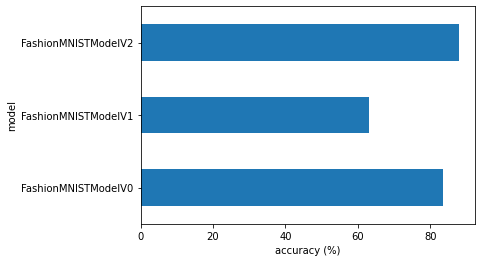

In [52]:
results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## Make and evaluate random predictions with best model

In [53]:
def make_prediction(model:torch.nn.Module,
                    data : list,
                    device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample= torch.unsqueeze(sample,dim=0).to(device)
      pred_logit= model(sample)
      pred_prob= torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.detach().cpu())
  return torch.stack(pred_probs)


In [54]:
import random
# random.seed(42)
test_samples = [] 
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

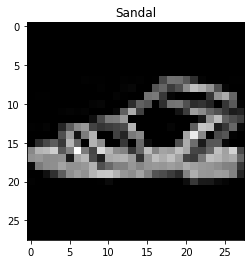

In [55]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [56]:
# Make predictions
pred_probs = make_prediction(model=model_2,

                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[4.4385e-05, 5.1864e-06, 9.8366e-05, 9.2808e-05, 1.7388e-05, 9.9106e-01,
         8.4182e-05, 5.7444e-03, 2.0925e-03, 7.5653e-04],
        [1.8672e-02, 6.9313e-03, 1.2381e-01, 5.3144e-03, 2.5546e-02, 8.3934e-04,
         7.9230e-01, 1.3516e-04, 2.5705e-02, 7.4333e-04]])

In [57]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 6, 8, 7, 5, 0, 1, 4])

In [58]:
test_labels

[5, 6, 6, 8, 7, 5, 0, 1, 4]

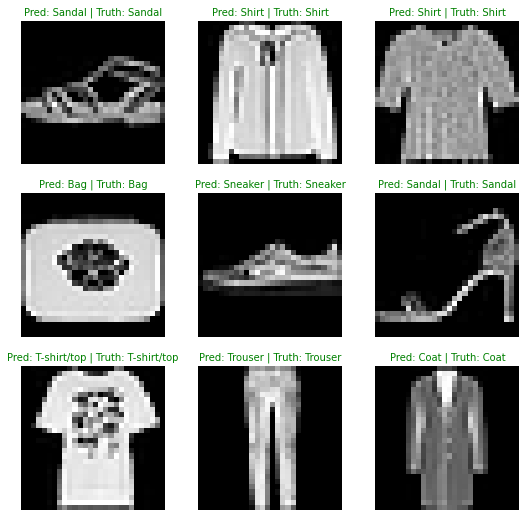

In [59]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form) 
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r") 
  
  plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation


A confusion matrix is a fantastic way of evaluating your classification models visually: https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics


1. Make predictions with our trained model on the test dataset

2. Make a confusion matrix torchmetrics.ConfusionMatrix - https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html

3. Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix() - http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [60]:
from tqdm.auto import tqdm

y_preds= []
y_true=[]
model_2.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader,desc= "Making Prediction...."):
    x,y=x.to(device),y.to(device)
    y_logit=model_2(x)
    y_pred=torch.softmax(y_logit,dim=1).argmax(dim=1)
    y_preds.append(y_pred.detach().cpu())
    y_true.append(y)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making Prediction....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [61]:
len(y_pred_tensor)

10000

In [62]:
try:
  import torchmetrics,mlxtend
  print(f"mlxtended version : {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]>= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtended version : 0.21.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mlxtend version: 0.21.0


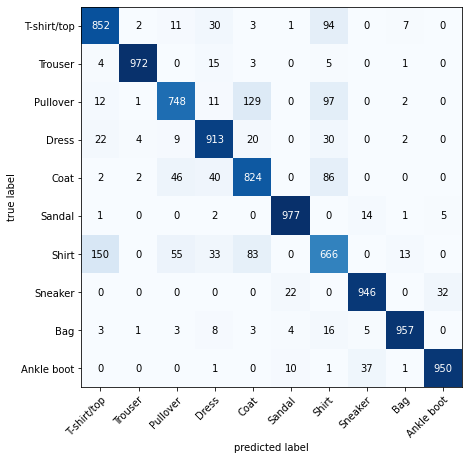

In [63]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

## Save and load best performing model

In [66]:
from pathlib import Path

MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
MODEL_NAME="04_pytorch_model.pth"
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

saving model to: models/04_pytorch_model.pth


In [67]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [69]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_fn(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [70]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)